In [37]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle

In [38]:
Data = pd.read_csv("Train.csv")
Data1 = pd.read_csv("Test.csv")

In [39]:
X_train = Data.drop('Y', axis=1)
y_train = Data.pop('Y')
X_test = Data1.drop('Y', axis=1)
y_test = Data1.pop('Y')


In [40]:
# Encoding the Y labels from object to categorical
ohe = OneHotEncoder()
ohe.fit(y_train.values.reshape(-1,1))
ohe.fit(y_test.values.reshape(-1,1))

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [41]:
cate_list = list(ohe.categories_[0])

In [42]:
y_train = ohe.transform(y_train.values.reshape(-1,1)).toarray()
y_test = ohe.transform(y_test.values.reshape(-1,1)).toarray()

In [43]:
y_train.shape

(4435, 6)

In [44]:
ss=StandardScaler()
ss.fit(X_train)
tf_X_train=ss.transform(X_train)
tf_X_test=ss.transform(X_test)

print(tf_X_train.shape)

(4435, 36)


In [45]:
tf_X_train = tf_X_train.T
tf_X_test = tf_X_test.T

**Cross Entropy**

In [46]:
theta = np.zeros((36,6))
cost = []
lamb = 0.0001
eta = 0.1
m  = 4435
p = 36
mu = 100
missclassif_trainlist,missclassif_testlist=[],[]
klist = [5,9,18,27,36]
Niter = 500
cost=[]
for k in klist:
  for i in range(Niter):
    z = np.dot(theta.T, tf_X_train)
    A = 1/(1+(np.exp(-z)))
    cost.append((-1/(2*m)) * np.sum(y_train.T * np.log(A) + (1 - y_train.T) * np.log(1 - A)) + (lamb/(2*m)) * np.sum(theta**2))
    theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train))/m) - (eta * (lamb/m) * theta)
    temp = (Niter-(2*i))/((2*i*mu)+Niter)
    mi = int(k + ((p-k)*max(0,temp)))
    if mi > k:
      sorted = np.sort(theta)
      reverse_sorted = np.flip(sorted, axis=None)
      temp1 = reverse_sorted[0:mi,0]
      for i,temp2 in enumerate(theta):
        if temp2 in temp1:
            pass
        else:
            theta[i,0]=0 
  Z_train = np.dot(theta.T,tf_X_train)
  h_x_train = 1/(1+np.exp(-Z_train))
  Z_test = np.dot(theta.T,tf_X_test)
  h_x_test = 1/(1+np.exp(-Z_test))
  l,k=[],[]
  for i in range(y_train.shape[0]):
    l.append(y_train[i].argmax())
  for j in range (h_x_train.shape[1]):
    k.append(h_x_train[:,j].argmax())
  l1,k1=[],[]
  for i in range(y_test.shape[0]):
    l1.append(y_test[i].argmax())
  for j in range (h_x_test.shape[1]):
    k1.append(h_x_test[:,j].argmax())
  missclassif_trainlist.append((1-accuracy_score(l,k))*4435)
  missclassif_testlist.append((1-accuracy_score(l1,k1))*2000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [47]:
temp1 = np.array(missclassif_trainlist)
temp1 = temp1/4435
training_error = temp1*100
temp2 = np.array(missclassif_testlist)
temp2 = temp2/2000
test_error = temp2*100

In [48]:
missclassif_trainlist

[1070.0000000000002, 1056.0, 1034.0000000000002, 1020.0, 1006.9999999999999]

In [49]:
missclassif_testlist

[526.0, 514.0, 506.0, 502.0, 498.0]

In [50]:
training_error

array([24.12626832, 23.81059752, 23.3145434 , 22.9988726 , 22.70574972])

In [51]:
test_error

array([26.3, 25.7, 25.3, 25.1, 24.9])

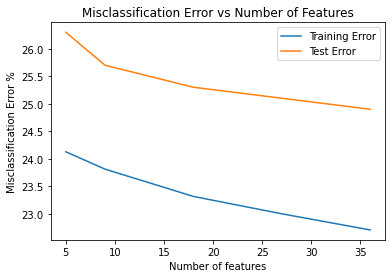

In [52]:
plt.plot(klist,training_error,label = 'Training Error')
plt.plot(klist,test_error,label = 'Test Error')
plt.title("Misclassification Error vs Number of Features")
plt.xlabel("Number of features")
plt.ylabel("Misclassification Error %")
plt.legend()

 **K=27**

In [53]:
theta = np.zeros((36,6))
cost = []
lamb = 0.0001
eta = 0.2
m  = 4435
p = 36
mu = 100
missclassif_trainlist,missclassif_testlist=[],[]
k = 27
Niter = 500
cost=[]
for i in range(Niter):
  z = np.dot(theta.T, tf_X_train)
  A = 1/(1+(np.exp(-z)))
  cost.append((-1/(2*m)) * np.sum(y_train.T * np.log(A) + (1 - y_train.T) * np.log(1 - A)) + (lamb/(2*m)) * np.sum(theta**2))
  theta = theta - (eta * np.dot(tf_X_train, (A.T - y_train))/m) - (eta * (lamb/m) * theta)
  temp = (Niter-(2*i))/((2*i*mu)+Niter)
  mi = int(k + ((p-k)*max(0,temp)))
  if mi > k:
    sorted = np.sort(theta)
    reverse_sorted = np.flip(sorted, axis=None)
    temp1 = reverse_sorted[0:mi,0]
    for i,temp2 in enumerate(theta):
      if temp2 in temp1:
          pass
      else:
          theta[i,0]=0 
Z_train = np.dot(theta.T,tf_X_train)
h_x_train = 1/(1+np.exp(-Z_train))
Z_test = np.dot(theta.T,tf_X_test)
h_x_test = 1/(1+np.exp(-Z_test))
l,k=[],[]
for i in range(y_train.shape[0]):
  l.append(y_train[i].argmax())
for j in range (h_x_train.shape[1]):
  k.append(h_x_train[:,j].argmax())
l1,k1=[],[]
for i in range(y_test.shape[0]):
  l1.append(y_test[i].argmax())
for j in range (h_x_test.shape[1]):
  k1.append(h_x_test[:,j].argmax())
missclassif_trainlist.append((1-accuracy_score(l,k)))
missclassif_testlist.append((1-accuracy_score(l1,k1)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Text(0, 0.5, 'Loss')

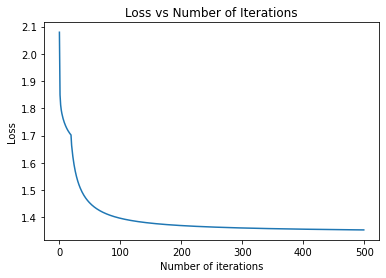

In [54]:
plt.plot(range(Niter),cost)
plt.title("Loss vs Number of Iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Loss")